In [1]:
# ## 1. Setup: Import Libraries
# First, we import all the necessary tools for our analysis.
!pip install missingno ydata-profiling pygwalker

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Specialized libraries for missing value analysis
import missingno as msno
from ydata_profiling import ProfileReport
import pygwalker as pyg

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Load the training dataset
train_df = pd.read_csv("train.csv")
train_df.head(3)

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0


In [3]:
def initial_summary(df: pd.DataFrame) -> None:
    """Prints a quick summary of missing values."""
    print("\n--- Initial Missing Value Summary ---")
    missing_counts = df.isnull().sum()
    missing_percentages = (missing_counts / len(df)) * 100
    summary_df = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage (%)': missing_percentages
    })
    print(summary_df[summary_df['Missing Count'] > 0].sort_values(by='Missing Percentage (%)', ascending=False))

initial_summary(train_df)


--- Initial Missing Value Summary ---
                  Missing Count  Missing Percentage (%)
key                        3074               10.246667
song_duration_ms           3067               10.223333
acousticness               3024               10.080000
liveness                   3022               10.073333
loudness                   2977                9.923333
danceability               2967                9.890000
instrumentalness           2966                9.886667
energy                     2935                9.783333


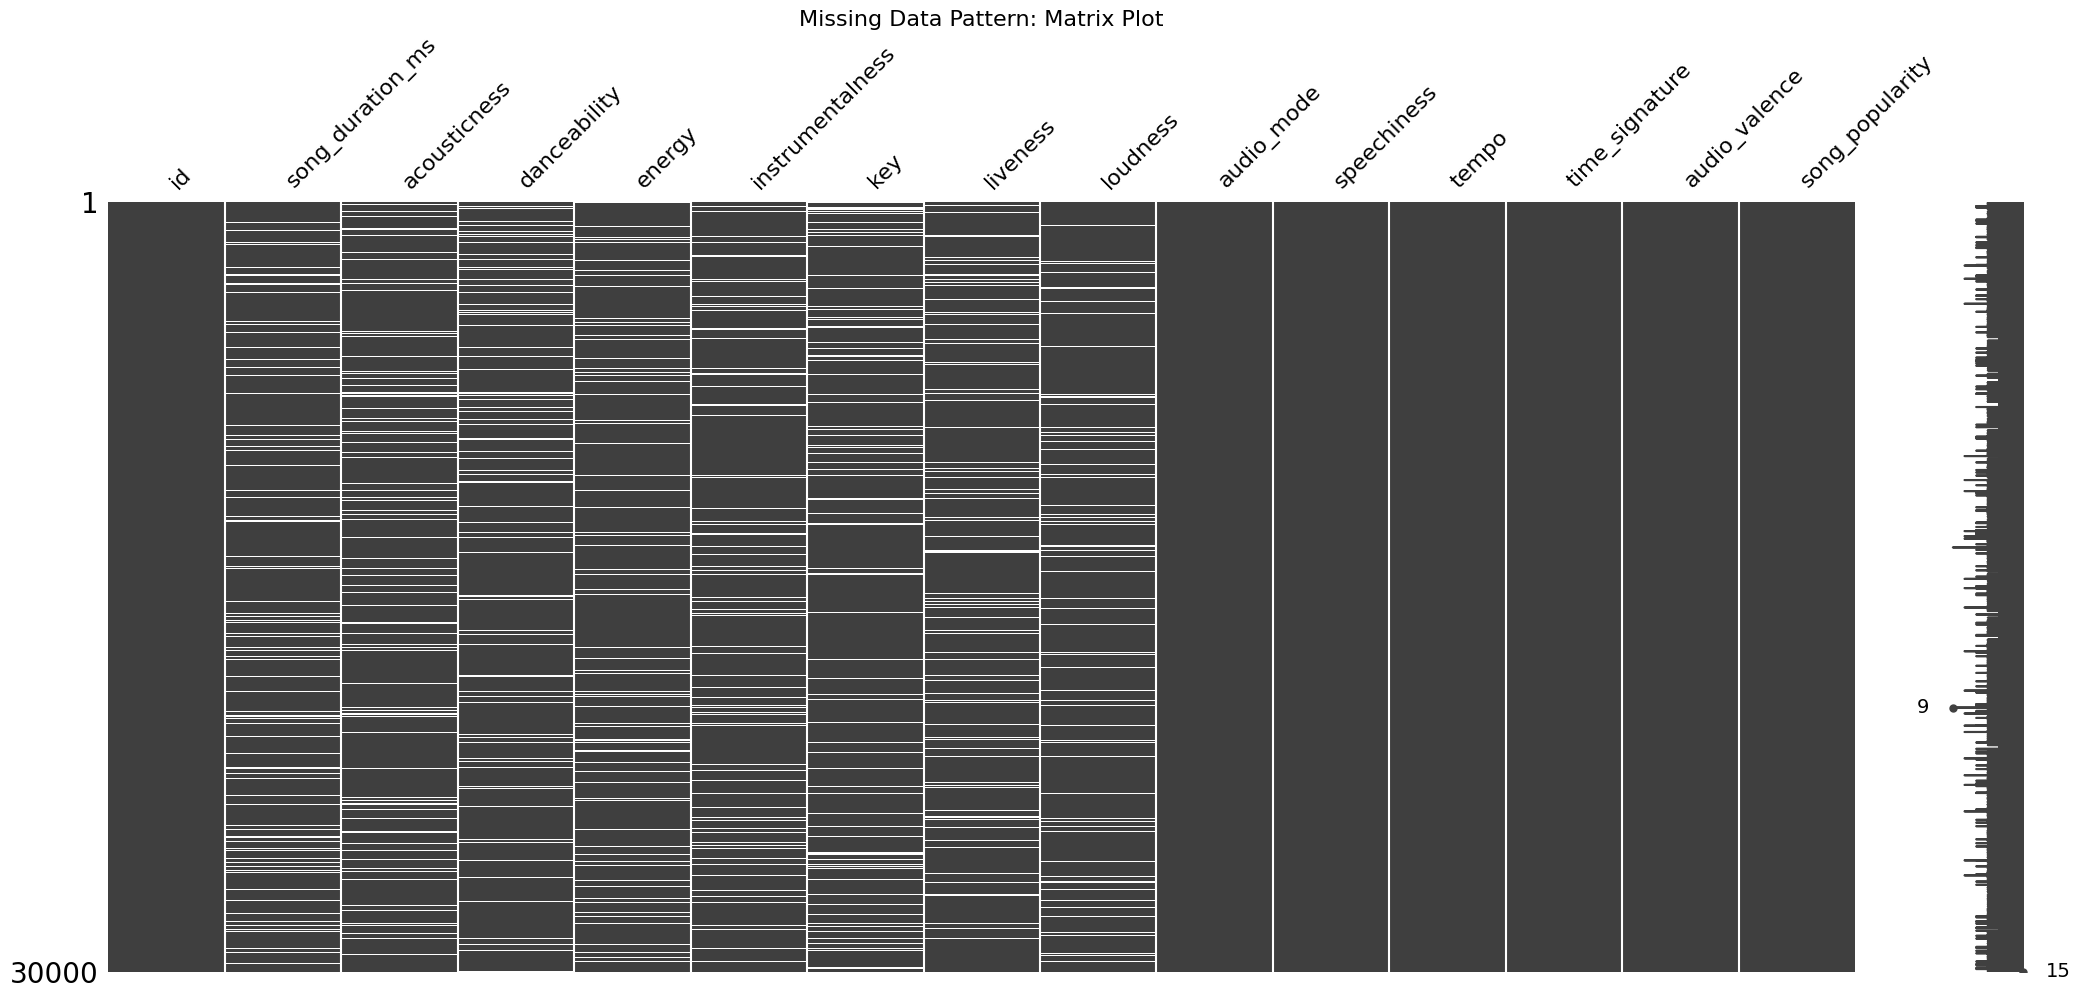

In [4]:
msno.matrix(train_df)
plt.title('Missing Data Pattern: Matrix Plot', fontsize=16)
plt.show()

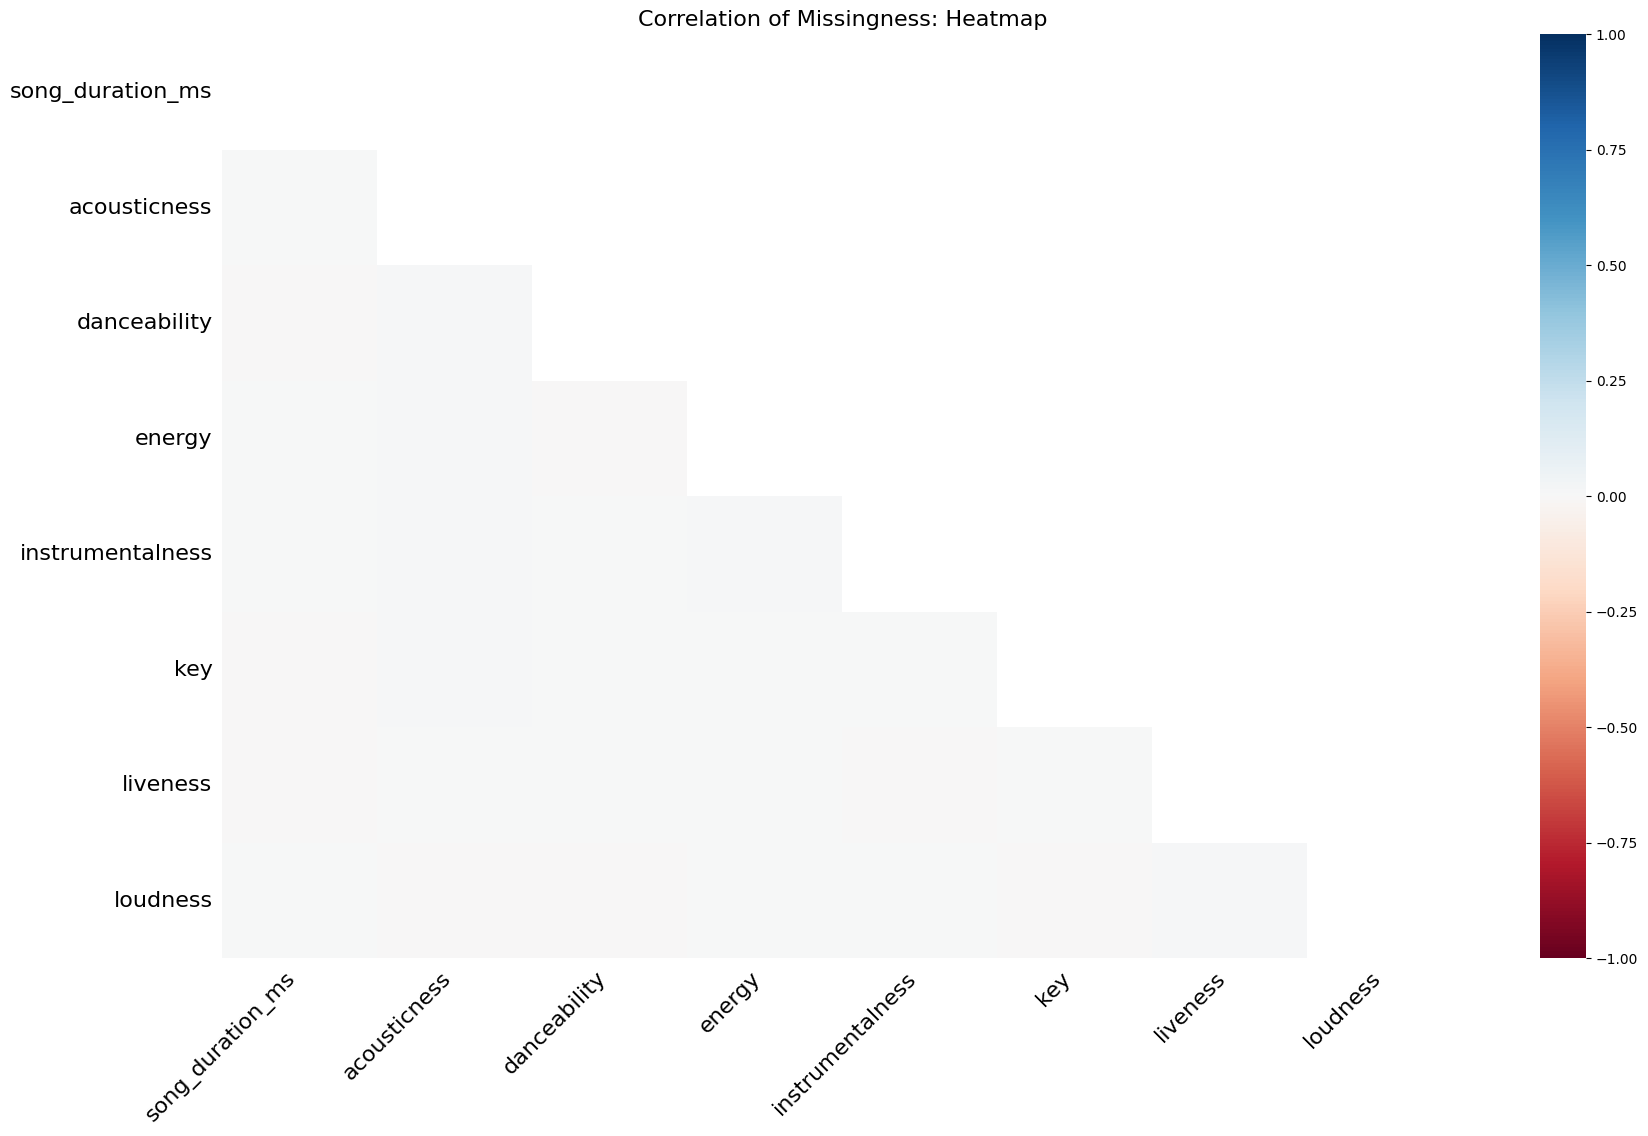

In [5]:
msno.heatmap(train_df)
plt.title('Correlation of Missingness: Heatmap', fontsize=16)
plt.show()

In [6]:
print("Generating detailed profile report for train_df...")

# 1. Create the ProfileReport object
profile = ProfileReport(
    train_df, 
    title="Interactive Profile Report for train_df", 
    explorative=True
)

# 2. Define the output filename
output_filename = "train_df_profile_report.html"

# 3. Save the report to an HTML file
profile.to_file(output_filename)

print(f"✅ Report successfully saved to '{output_filename}'.")
print("You can now open this file in any web browser to view the interactive report.")

Generating detailed profile report for train_df...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 31.33it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Report successfully saved to 'train_df_profile_report.html'.
You can now open this file in any web browser to view the interactive report.


In [7]:
pyg.walk(train_df)

Box(children=(HTML(value='\n<div id="ifr-pyg-00063e57c7ba776dDBo590vyr4PFeLQR" style="height: auto">\n    <hea…

In [8]:
train_df.describe()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,30000.000000,26933.000000,26976.000000,27033.000000,27065.000000,27034.000000,26926.000000,26978.000000,27023.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000
mean,14999.500000,193309.698660,0.277219,0.571056,0.683746,0.036184,5.044752,0.198926,-7.418965,0.321167,0.093773,116.557754,3.393967,0.581015,0.36440
std,8660.398374,45713.675116,0.298704,0.189676,0.213314,0.149116,3.379665,0.151879,3.892481,0.466932,0.083474,26.188606,0.525198,0.237429,0.48127
min,0.000000,25658.000000,-0.013551,0.043961,-0.001682,-0.004398,0.000000,0.027843,-30.170399,0.000000,0.015065,63.478876,2.000000,0.013398,0.00000
25%,7499.750000,166492.000000,0.039530,0.425141,0.538968,0.000952,2.000000,0.111956,-9.586576,0.000000,0.038421,97.000171,3.000000,0.398907,0.00000
50%,14999.500000,186908.000000,0.140486,0.607879,0.705028,0.001967,6.000000,0.136253,-6.356886,0.000000,0.055611,113.795116,3.000000,0.599059,0.00000
75%,22499.250000,215039.000000,0.484065,0.718443,0.870518,0.003226,8.000000,0.213505,-4.618818,1.000000,0.117877,128.497863,4.000000,0.760160,1.00000
max,29999.000000,470577.000000,1.065284,0.957131,1.033434,1.075415,11.000000,1.065298,-0.877346,1.000000,0.560748,218.637439,5.000000,1.022283,1.00000


In [9]:
train_df['song_duration_s'] = train_df['song_duration_ms'] / 1000


In [10]:
!pip install feature_engine
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OrdinalEncoder

In [11]:
# --- Step 2.1: Semantic Clipping ---
# Correcting values that are outside their documented, logical range.
print("--- Running Step 2.1: Semantic Clipping ---")
semantic_clip_cols = [
    'acousticness', 'danceability', 'energy', 'instrumentalness', 
    'liveness', 'speechiness', 'audio_valence'
]
for col in semantic_clip_cols:
    if col in train_df.columns:
        train_df[col] = train_df[col].clip(0, 1)
print("Semantic clipping complete.")

--- Running Step 2.1: Semantic Clipping ---
Semantic clipping complete.


In [12]:
print("\n--- Running Step 2: SOTA Imputation ---")

# Define columns
numeric_cols = train_df.select_dtypes(include=np.number).columns
categorical_cols = ['key'] # Assuming 'key' is the only categorical with NaNs

impute_df = train_df.copy()
# Temporarily encode categoricals for the imputer
encoder = OrdinalEncoder()
impute_df[categorical_cols] = encoder.fit_transform(impute_df[categorical_cols])

missforest_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=42),
    max_iter=5, random_state=42, initial_strategy='median'
)

imputed_data = missforest_imputer.fit_transform(impute_df)
train_df_imputed = pd.DataFrame(imputed_data, columns=impute_df.columns)

# Decode categoricals back
train_df_imputed[categorical_cols] = encoder.inverse_transform(train_df_imputed[categorical_cols])
train_df_imputed[categorical_cols] = train_df_imputed[categorical_cols].round().astype(int)

print("SOTA Imputation complete. No missing values remain.")
print("\nImputed DataFrame:")
print(train_df_imputed.head())


--- Running Step 2: SOTA Imputation ---
SOTA Imputation complete. No missing values remain.

Imputed DataFrame:
    id  song_duration_ms  acousticness  danceability    energy  \
0  0.0          212990.0      0.642286      0.856520  0.707073   
1  1.0          186904.2      0.054866      0.733289  0.835545   
2  2.0          193213.0      0.172188      0.188387  0.783524   
3  3.0          249893.0      0.488660      0.585234  0.552685   
4  4.0          165969.0      0.493017      0.595957  0.740982   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.002001   10  0.387699 -5.619088         0.0     0.082570   
1          0.000996    8  0.436428 -5.236965         1.0     0.127358   
2          0.000000    5  0.170499 -4.951759         0.0     0.052282   
3          0.000608    0  0.094805 -7.893694         0.0     0.035618   
4          0.002033   10  0.094891 -2.684095         0.0     0.050746   

        tempo  time_signature  audio_valence  song_

In [13]:
print("\n--- Running Step 3: SOTA Winsorization ---")
winsorize_cols = ['loudness', 'tempo', 'song_duration_ms']
mad_winsorizer = Winsorizer(
    capping_method='mad',
    tail='both',
    fold=3,
    variables=winsorize_cols
)

# Apply winsorization to the imputed DataFrame
train_df_cleaned = mad_winsorizer.fit_transform(train_df_imputed)
# Drop Song Duration ms
train_df_cleaned = train_df_cleaned.drop('song_duration_ms', axis=1)

print("Winsorization complete.")
print("\nFinal Cleaned DataFrame (Ready for Transformation/Scaling):")
print(train_df_cleaned.head())


--- Running Step 3: SOTA Winsorization ---
Winsorization complete.

Final Cleaned DataFrame (Ready for Transformation/Scaling):
    id  acousticness  danceability    energy  instrumentalness  key  liveness  \
0  0.0      0.642286      0.856520  0.707073          0.002001   10  0.387699   
1  1.0      0.054866      0.733289  0.835545          0.000996    8  0.436428   
2  2.0      0.172188      0.188387  0.783524          0.000000    5  0.170499   
3  3.0      0.488660      0.585234  0.552685          0.000608    0  0.094805   
4  4.0      0.493017      0.595957  0.740982          0.002033   10  0.094891   

   loudness  audio_mode  speechiness       tempo  time_signature  \
0 -5.619088         0.0     0.082570  158.386236             4.0   
1 -5.236965         1.0     0.127358  102.752988             3.0   
2 -4.951759         0.0     0.052282  178.685791             3.0   
3 -7.893694         0.0     0.035618  128.715630             3.0   
4 -2.684095         0.0     0.050746  121.92

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numeric features for VIF calculation
numeric_df = train_df_cleaned.select_dtypes(include=np.number)

# Drop the target and any identifiers if they are present
if 'song_popularity' in numeric_df.columns:
    numeric_df = numeric_df.drop('song_popularity', axis=1)
if 'id' in numeric_df.columns:
    numeric_df = numeric_df.drop('id', axis=1)
if 'time_signature' in numeric_df.columns:
    numeric_df = numeric_df.drop('time_signature', axis=1)
if 'song_duration_ms' in numeric_df.columns:
    numeric_df = numeric_df.drop('song_duration_ms', axis=1)
if 'tempo' in numeric_df.columns:
    numeric_df = numeric_df.drop('tempo', axis=1)
if 'song_duration_s' in numeric_df.columns:
    numeric_df = numeric_df.drop('song_duration_s', axis=1)
if 'danceability' in numeric_df.columns:
    numeric_df = numeric_df.drop('danceability', axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) 
                   for i in range(len(numeric_df.columns))]

print("--- Variance Inflation Factor (VIF) ---")
print(vif_data.sort_values(by="VIF", ascending=False))

--- Variance Inflation Factor (VIF) ---
            feature       VIF
1            energy  9.774226
8     audio_valence  7.508890
5          loudness  5.862493
3               key  3.538927
0      acousticness  2.937190
4          liveness  2.934683
7       speechiness  2.303289
6        audio_mode  1.476201
2  instrumentalness  1.117399


In [15]:
# ## Step 1.1: Automated Report with YData Profiling
# This is the most efficient first step. It will automatically run correlation analyses,
# flag highly correlated variables, and provide initial warnings.

from ydata_profiling import ProfileReport

# Assuming `train_df_cleaned` is your fully imputed DataFrame from the previous step
profile = ProfileReport(
    train_df_cleaned, 
    title="Spotify Multicollinearity Analysis Report",
    correlations={"pearson": {"calculate": True}}
)

# This will generate an interactive report with a dedicated "Correlations" tab.
# Look for bright red or blue cells in the heatmap and any specific warnings.
profile.to_file("multicollinearity_report.html")

print("Automated report generated. Please inspect the 'Correlations' tab.")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 30.32it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Automated report generated. Please inspect the 'Correlations' tab.


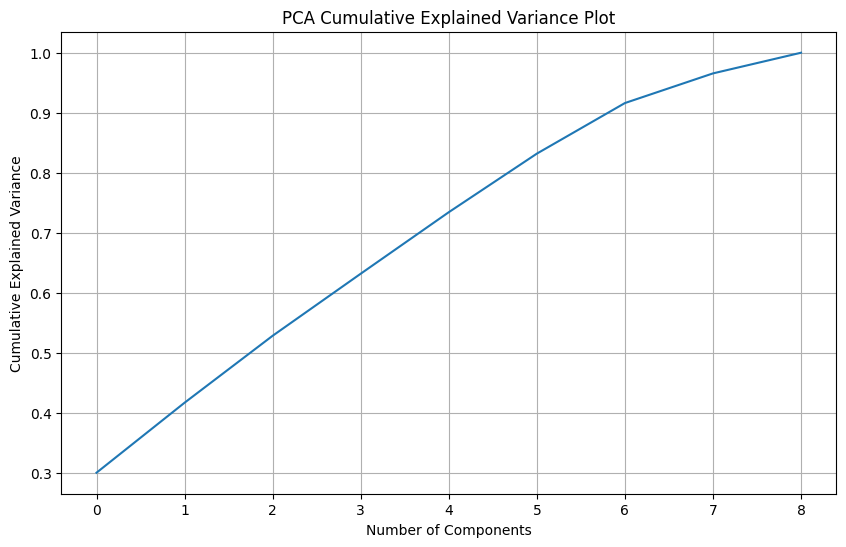

In [16]:
# ## Step 3.1: Diagnostic PCA
# We use PCA not to transform the data, but to diagnose latent collinearity.
# If a few components can explain most of the variance, it confirms that
# many features are redundant and the data has a lower intrinsic dimension.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA is sensitive to scale, so we scale the data for this diagnostic step
pca_scaler = StandardScaler()
scaled_numeric_data = pca_scaler.fit_transform(numeric_df)

pca = PCA().fit(scaled_numeric_data)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [17]:
!pip install shap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import xgboost as xgb
import shap
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

train_df_cleaned.head()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity,song_duration_s
0,0.0,0.642286,0.856520,0.707073,0.002001,10,0.387699,-5.619088,0.0,0.082570,158.386236,4.0,0.734642,0.0,212.9900
1,1.0,0.054866,0.733289,0.835545,0.000996,8,0.436428,-5.236965,1.0,0.127358,102.752988,3.0,0.711531,1.0,186.9045
2,2.0,0.172188,0.188387,0.783524,0.000000,5,0.170499,-4.951759,0.0,0.052282,178.685791,3.0,0.425536,0.0,193.2130
3,3.0,0.488660,0.585234,0.552685,0.000608,0,0.094805,-7.893694,0.0,0.035618,128.715630,3.0,0.453597,0.0,249.8930
4,4.0,0.493017,0.595957,0.740982,0.002033,10,0.094891,-2.684095,0.0,0.050746,121.928157,4.0,0.741311,0.0,165.9690


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, learning_curve
from sklearn.metrics import roc_auc_score

np.random.seed(42)

print("Libraries imported successfully.")

Libraries imported successfully.


In [19]:
print("--- Step 1: Setting up validation framework ---")

# --- Step 1.1: Create Final Holdout Set (15%) ---
# We use stratification to ensure the class balance is preserved.
X = train_df_cleaned.drop('song_popularity', axis=1)
y = train_df_cleaned['song_popularity']

X_train_val, X_holdout, y_train_val, y_holdout = train_test_split(
    X, y, 
    test_size=0.15, 
    random_state=42, 
    stratify=y
)

print(f"Train/Validation set size: {len(X_train_val)} ({len(X_train_val) / len(X):.0%})")
print(f"Holdout set size: {len(X_holdout)} ({len(X_holdout) / len(X):.0%})")

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("\n5-fold stratified CV strategy is defined.")

--- Step 1: Setting up validation framework ---
Train/Validation set size: 25500 (85%)
Holdout set size: 4500 (15%)

5-fold stratified CV strategy is defined.


In [20]:

print("\n--- Step 2: Defining feature sets for comparison ---")

# --- Step 2.1: Full Feature Set ---
# All original cleaned features, excluding the ID.
full_feature_set = [col for col in X_train_val.columns if col != 'id']

# --- Step 2.2: Reduced Feature Set ---
# We remove the features with the highest VIF scores identified in the audit.
features_to_drop = ['time_signature', 'tempo', 'danceability', 'song_duration_s']
reduced_feature_set = [col for col in full_feature_set if col not in features_to_drop]

print(f"\nFull feature set includes {len(full_feature_set)} features.")
print(f"Reduced feature set includes {len(reduced_feature_set)} features.")


--- Step 2: Defining feature sets for comparison ---

Full feature set includes 13 features.
Reduced feature set includes 9 features.


In [21]:
print("\n--- Step 3: Training and evaluating baseline models ---")

# --- Step 3.1: Address Threshold Sensitivity ---
print("\nLabel Audit Note: The target 'song_popularity' is a fixed binary variable.")
print("No thresholding experiments are possible. Proceeding with the given labels.")

models = {
    'ElasticNet': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, class_weight='balanced', random_state=42),
    'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

feature_sets = {
    'Full Features': full_feature_set,
    'Reduced Features': reduced_feature_set
}

metrics = ['roc_auc', 'average_precision', 'neg_brier_score']

results = []

for f_name, f_set in feature_sets.items():
    for m_name, model in models.items():
        print(f"Running {m_name} on {f_name}...")
        scores = cross_validate(
            model,
            X_train_val[f_set],
            y_train_val,
            cv=cv_strategy,
            scoring=metrics
        )
        
        for metric in metrics:
            results.append({
                'Model': m_name,
                'Feature Set': f_name,
                'Metric': metric,
                'Mean Score': np.mean(scores[f'test_{metric}']),
                'Std Score': np.std(scores[f'test_{metric}'])
            })

# Create and display the leaderboard
leaderboard = pd.DataFrame(results)
print("\n--- Baseline Model Leaderboard ---")
print(leaderboard.round(4))


--- Step 3: Training and evaluating baseline models ---

Label Audit Note: The target 'song_popularity' is a fixed binary variable.
No thresholding experiments are possible. Proceeding with the given labels.
Running ElasticNet on Full Features...


/data1/home/nitinvetcha/miniconda3/envs/ashwin/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/data1/home/nitinvetcha/miniconda3/envs/ashwin/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/data1/home/nitinvetcha/miniconda3/envs/ashwin/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/data1/home/nitinvetcha/miniconda3/envs/ashwin/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/data1/home/nitinvetcha/miniconda3/envs/ashwin/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached w

Running RandomForest on Full Features...
Running XGBoost on Full Features...
Running ElasticNet on Reduced Features...
Running RandomForest on Reduced Features...
Running XGBoost on Reduced Features...

--- Baseline Model Leaderboard ---
           Model       Feature Set             Metric  Mean Score  Std Score
0     ElasticNet     Full Features            roc_auc      0.5346     0.0060
1     ElasticNet     Full Features  average_precision      0.3934     0.0033
2     ElasticNet     Full Features    neg_brier_score     -0.2491     0.0003
3   RandomForest     Full Features            roc_auc      0.5616     0.0073
4   RandomForest     Full Features  average_precision      0.4124     0.0060
5   RandomForest     Full Features    neg_brier_score     -0.2305     0.0011
6        XGBoost     Full Features            roc_auc      0.5523     0.0098
7        XGBoost     Full Features  average_precision      0.4151     0.0040
8        XGBoost     Full Features    neg_brier_score     -0.2422    

Running sanity checks on champion model: RandomForest with Full Features.

Adversarial Validation AUC: 0.4988


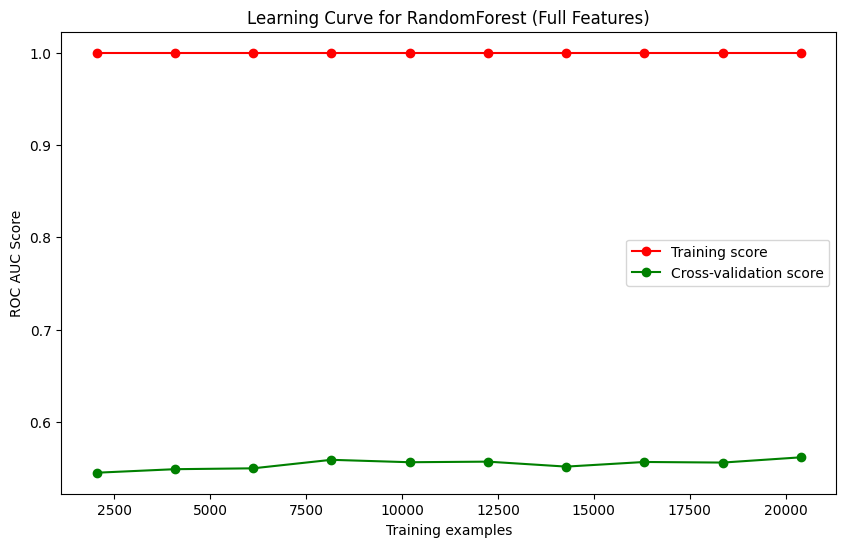

In [22]:
# ## 5. Sanity & Overfitting Checks (Updated)

# --- Select the best model/feature combo from the leaderboard ---
best_model = RandomForestClassifier(class_weight='balanced', random_state=42)
best_features = full_feature_set

print(f"Running sanity checks on champion model: RandomForest with Full Features.")

# --- Step 4.1: Adversarial Validation ---
# (The code remains the same, but now uses the correct feature set implicitly via `adv_X[best_features]`)
adv_X = pd.concat([X_train_val, X_holdout])
adv_y = pd.Series([0] * len(X_train_val) + [1] * len(X_holdout))
adv_model_check = xgb.XGBClassifier(random_state=42) # A quick model is fine for this check
adv_scores = cross_validate(adv_model_check, adv_X[best_features], adv_y, cv=StratifiedKFold(n_splits=3), scoring='roc_auc')
adv_auc = np.mean(adv_scores['test_score'])
print(f"\nAdversarial Validation AUC: {adv_auc:.4f}")


# --- Step 4.2: Plot Learning Curves ---
train_sizes, train_scores, val_scores = learning_curve(
    best_model,
    X_train_val[best_features],
    y_train_val,
    cv=cv_strategy,
    scoring='roc_auc',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# (The plotting code remains the same)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve for RandomForest (Full Features)')
plt.xlabel('Training examples')
plt.ylabel('ROC AUC Score')
plt.legend(loc="best")
plt.show()

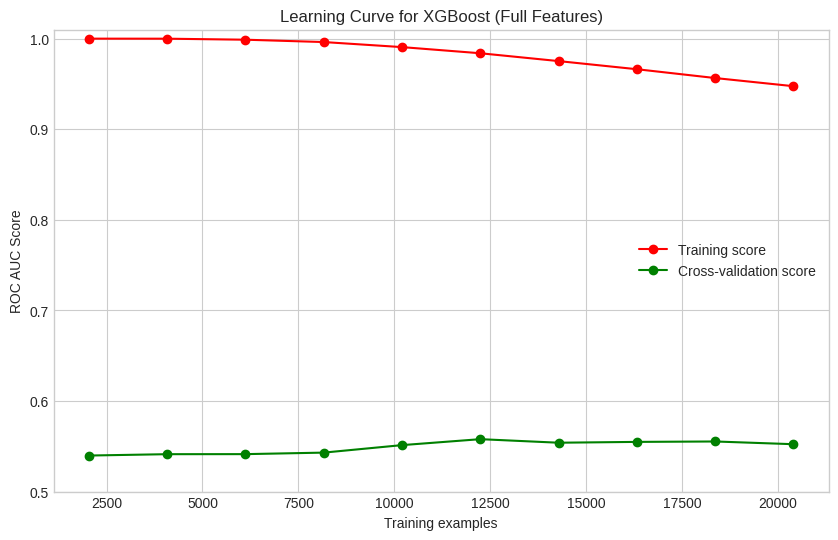

In [23]:
# ## Generating the XGBoost Learning Curve

import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import learning_curve

# --- Setup: Define the model and features ---
# We use the default XGBoost model and the full feature set
model_to_check = xgb.XGBClassifier(random_state=42)
features_to_use = full_feature_set

# --- Generate Learning Curve Data ---
# This function performs cross-validation for different training set sizes
train_sizes, train_scores, val_scores = learning_curve(
    model_to_check,
    X_train_val[features_to_use],
    y_train_val,
    cv=cv_strategy,
    scoring='roc_auc',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# --- Plot the Learning Curve ---
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve for XGBoost (Full Features)')
plt.xlabel('Training examples')
plt.ylabel('ROC AUC Score')
plt.legend(loc="best")
plt.ylim(0.5, 1.01) # Set y-axis to be consistent with the RandomForest plot
plt.show()

In [24]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score
import optuna
import warnings

optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore", category=UserWarning)

print("Libraries imported successfully.")

Libraries imported successfully.


In [25]:
features_to_use = [col for col in train_df_cleaned.columns if col not in ['id', 'song_popularity']]
X = train_df_cleaned[features_to_use]
y = train_df_cleaned['song_popularity']

print(f"\nSetup complete. Using {len(features_to_use)} features.")


Setup complete. Using 13 features.


In [26]:
# ## 2. Define the Optuna Objective Function
# This function will be called by Optuna for each trial. It defines the
# hyperparameter search space and returns the model's performance score.

def objective_rf(trial, X, y, inner_cv):
    """Optuna objective function for RandomForestClassifier."""
    
    # Define the hyperparameter search space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 50),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1
    }
    
    model = RandomForestClassifier(**params)
    
    # Perform cross-validation on the inner loop folds
    scores = cross_val_score(model, X, y, cv=inner_cv, scoring='roc_auc')
    
    # Return the mean score for this set of hyperparameters
    return np.mean(scores)

print("Optuna objective function for RandomForest defined.")

Optuna objective function for RandomForest defined.


In [ ]:
# ## Define Objective Functions for LightGBM and XGBoost
import lightgbm as lgb
import xgboost as xgb

def objective_lgbm(trial, X, y, inner_cv):
    """Optuna objective function for LightGBM."""
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
    }
    model = lgb.LGBMClassifier(**params, random_state=42)
    scores = cross_val_score(model, X, y, cv=inner_cv, scoring='roc_auc')
    return np.mean(scores)


def objective_xgb(trial, X, y, inner_cv):
    """Optuna objective function for XGBoost."""
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'verbosity': 0, 
        'booster': 'gbtree',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'lambda': trial.suggest_float('lambda', 1e-8, 10.0, log=True), # L2 reg
        'alpha': trial.suggest_float('alpha', 1e-8, 10.0, log=True),   # L1 reg
    }
    model = xgb.XGBClassifier(**params, random_state=42)
    scores = cross_val_score(model, X, y, cv=inner_cv, scoring='roc_auc')
    return np.mean(scores)

print("Objective functions for LightGBM and XGBoost defined.")

Objective functions for LightGBM and XGBoost defined.


In [ ]:
# ## Run the Full Nested CV Experiment for All Models

print("\n--- Starting Full Nested Cross-Validation Experiment ---")

# --- Setup the experiment ---
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary of objective functions to test
objectives = {
    "RandomForest": objective_rf,
    "LightGBM": objective_lgbm,
    "XGBoost": objective_xgb
}

# Dictionary to store the final scores for each model
final_scores = {name: [] for name in objectives.keys()}


# --- Main Loop ---
for model_name, objective_func in objectives.items():
    print(f"\n===== Tuning {model_name} =====")
    
    for i, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):
        print(f"--- Outer Fold {i+1}/5 for {model_name} ---")
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        
        study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())
        study.optimize(
            lambda trial: objective_func(trial, X_train, y_train, inner_cv),
            n_trials=100, # Budget of 100 trials
            n_jobs=-1
        )
        
        best_params = study.best_params
        
        # Instantiate the correct model type
        if model_name == "RandomForest":
            final_model = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
        elif model_name == "LightGBM":
            final_model = lgb.LGBMClassifier(**best_params, objective='binary', metric='auc', verbosity=-1, random_state=42)
        elif model_name == "XGBoost":
            final_model = xgb.XGBClassifier(**best_params, objective='binary:logistic', eval_metric='auc', verbosity=0, random_state=42)

        final_model.fit(X_train, y_train)
        score = roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])
        final_scores[model_name].append(score)
        print(f"Unbiased AUC for {model_name} on fold {i+1}: {score:.4f}")



--- Starting Full Nested Cross-Validation Experiment ---

===== Tuning RandomForest =====
--- Outer Fold 1/5 for RandomForest ---
Unbiased AUC for RandomForest on fold 1: 0.5651
--- Outer Fold 2/5 for RandomForest ---
Unbiased AUC for RandomForest on fold 2: 0.5742
--- Outer Fold 3/5 for RandomForest ---
Unbiased AUC for RandomForest on fold 3: 0.5857
--- Outer Fold 4/5 for RandomForest ---
Unbiased AUC for RandomForest on fold 4: 0.5760
--- Outer Fold 5/5 for RandomForest ---
Unbiased AUC for RandomForest on fold 5: 0.5701

===== Tuning LightGBM =====
--- Outer Fold 1/5 for LightGBM ---
Unbiased AUC for LightGBM on fold 1: 0.5784
--- Outer Fold 2/5 for LightGBM ---
Unbiased AUC for LightGBM on fold 2: 0.5868
--- Outer Fold 3/5 for LightGBM ---
Unbiased AUC for LightGBM on fold 3: 0.5930
--- Outer Fold 4/5 for LightGBM ---
Unbiased AUC for LightGBM on fold 4: 0.5842
--- Outer Fold 5/5 for LightGBM ---
Unbiased AUC for LightGBM on fold 5: 0.5784

===== Tuning XGBoost =====
--- Outer Fo

In [29]:
# ## Final Tuned Model Leaderboard

print("\n--- Final Tuned Model Results ---")
leaderboard_data = []
for model_name, scores in final_scores.items():
    leaderboard_data.append({
        "Model": model_name,
        "Mean AUC": np.mean(scores),
        "Std Dev": np.std(scores)
    })

final_leaderboard = pd.DataFrame(leaderboard_data).sort_values(by="Mean AUC", ascending=False)
print(final_leaderboard.round(4))

print("\nThis leaderboard shows the final, unbiased performance of each tuned SOTA model.")


--- Final Tuned Model Results ---
          Model  Mean AUC  Std Dev
1      LightGBM    0.5842   0.0055
2       XGBoost    0.5815   0.0066
0  RandomForest    0.5742   0.0069

This leaderboard shows the final, unbiased performance of each tuned SOTA model.


In [33]:
import optuna
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# --- This uses the full train_val_df and the objective functions from Phase 2 ---
X_to_tune = X_train_val
y_to_tune = y_train_val

# We'll use a simple 3-fold CV for this final tuning run
tuning_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

print("--- Starting final tuning run to get best overall parameters ---")

# ==============================================================================
# 1. TUNE LIGHTGBM
# ==============================================================================
print("\n--- Tuning LightGBM ---")
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(
    lambda trial: objective_lgbm(trial, X_to_tune, y_to_tune, tuning_cv),
    n_trials=200 # Larger budget for the final run
)
best_lgbm_params = study_lgbm.best_params
print("✅ Best LightGBM Parameters Found:", best_lgbm_params)


# ==============================================================================
# 2. TUNE XGBOOST
# ==============================================================================
print("\n--- Tuning XGBoost ---")
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(
    lambda trial: objective_xgb(trial, X_to_tune, y_to_tune, tuning_cv),
    n_trials=200
)
best_xgb_params = study_xgb.best_params
print("✅ Best XGBoost Parameters Found:", best_xgb_params)


# ==============================================================================
# 3. TUNE RANDOMFOREST
# ==============================================================================
print("\n--- Tuning RandomForest ---")
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(
    lambda trial: objective_rf(trial, X_to_tune, y_to_tune, tuning_cv),
    n_trials=100 
)
best_rf_params = study_rf.best_params
print("✅ Best RandomForest Parameters Found:", best_rf_params)

--- Starting final tuning run to get best overall parameters ---

--- Tuning LightGBM ---
✅ Best LightGBM Parameters Found: {'n_estimators': 202, 'learning_rate': 0.040934462227206626, 'num_leaves': 40, 'max_depth': 3, 'lambda_l1': 0.7300431351105385, 'lambda_l2': 0.0002835501979447363}

--- Tuning XGBoost ---
✅ Best XGBoost Parameters Found: {'n_estimators': 251, 'learning_rate': 0.03407531088032925, 'max_depth': 3, 'lambda': 5.198682087317478e-08, 'alpha': 8.087399034140226}

--- Tuning RandomForest ---
✅ Best RandomForest Parameters Found: {'n_estimators': 237, 'max_depth': 9, 'min_samples_leaf': 31, 'max_features': 0.21454529446155646}


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Validation & Utilities
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

print("Libraries imported successfully.")

Libraries imported successfully.


In [35]:
features_to_use = [col for col in train_df_cleaned.columns if col not in ['id', 'song_popularity']]
X = train_df_cleaned[features_to_use]
y = train_df_cleaned['song_popularity']

In [36]:
def generate_oof_predictions(model, X, y, cv):
    """Generates Out-of-Fold predictions for a given model."""
    oof_preds = np.zeros(len(X))
    
    for train_idx, val_idx in cv.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        model.fit(X_train, y_train)
        oof_preds[val_idx] = model.predict_proba(X_val)[:, 1]
        
    return oof_preds

# Define our CV strategy for generating OOF predictions
oof_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a DataFrame to store all our OOF predictions
oof_df = pd.DataFrame(index=X.index)

print("OOF prediction function and DataFrame are ready.")

OOF prediction function and DataFrame are ready.


In [37]:
# ## 3. Generate OOF Predictions for Best Tuned Models

print("--- Generating OOF predictions for best tuned models ---")

# LightGBM
lgbm = lgb.LGBMClassifier(**best_lgbm_params, random_state=42)
oof_df['oof_lgbm'] = generate_oof_predictions(lgbm, X, y, oof_cv)
print("LightGBM OOF predictions generated.")

# XGBoost
xgb_model = xgb.XGBClassifier(**best_xgb_params, random_state=42)
oof_df['oof_xgb'] = generate_oof_predictions(xgb_model, X, y, oof_cv)
print("XGBoost OOF predictions generated.")

# RandomForest
rf = RandomForestClassifier(**best_rf_params, random_state=42, class_weight='balanced')
oof_df['oof_rf'] = generate_oof_predictions(rf, X, y, oof_cv)
print("RandomForest OOF predictions generated.")

--- Generating OOF predictions for best tuned models ---
LightGBM OOF predictions generated.
XGBoost OOF predictions generated.
RandomForest OOF predictions generated.


In [38]:
# ## 4. Train Diversity Set: Shallow MLP (Neural Network)

print("\n--- Training diversity set: Shallow MLP ---")

# Define a simple but robust MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.001,
    batch_size=256,
    learning_rate='adaptive',
    early_stopping=True,
    random_state=42
)

oof_df['oof_mlp'] = generate_oof_predictions(mlp, X, y, oof_cv)
print("MLP OOF predictions generated.")


--- Training diversity set: Shallow MLP ---
MLP OOF predictions generated.


In [39]:
# ## 5. Train Diversity Set: Bagged Variants
# Create diverse models by training our best boosters on different bootstrap samples.

N_BAGS = 3 # We'll create 3 variants for each
print(f"\n--- Training diversity set: {N_BAGS} Bagged Variants for LGBM and XGB ---")

for i in range(N_BAGS):
    print(f"Training Bagged Variant {i+1}/{N_BAGS}...")
    
    # Create a bootstrap sample of the data indices
    bag_indices = resample(X.index, replace=True, n_samples=len(X), random_state=i)
    X_bag, y_bag = X.loc[bag_indices], y.loc[bag_indices]
    
    # Train and predict with a bagged LightGBM
    lgbm_bag = lgb.LGBMClassifier(**best_lgbm_params, random_state=42)
    oof_df[f'oof_lgbm_bag_{i}'] = generate_oof_predictions(lgbm_bag, X_bag, y_bag, oof_cv)
    
    # Train and predict with a bagged XGBoost
    xgb_bag = xgb.XGBClassifier(**best_xgb_params, random_state=42)
    oof_df[f'oof_xgb_bag_{i}'] = generate_oof_predictions(xgb_bag, X_bag, y_bag, oof_cv)

print("Bagged variant OOF predictions generated.")
print("\nFinal OOF DataFrame:")
print(oof_df.head())


--- Training diversity set: 3 Bagged Variants for LGBM and XGB ---
Training Bagged Variant 1/3...
Training Bagged Variant 2/3...
Training Bagged Variant 3/3...
Bagged variant OOF predictions generated.

Final OOF DataFrame:
   oof_lgbm   oof_xgb    oof_rf   oof_mlp  oof_lgbm_bag_0  oof_xgb_bag_0  \
0  0.433751  0.440254  0.547639  0.285983        0.320925       0.309097   
1  0.508836  0.537617  0.554734  0.232597        0.393858       0.396380   
2  0.405057  0.395036  0.510781  0.295142        0.423170       0.452092   
3  0.363538  0.365816  0.485133  0.264079        0.327927       0.377972   
4  0.294235  0.295499  0.428448  0.275388        0.278858       0.264923   

   oof_lgbm_bag_1  oof_xgb_bag_1  oof_lgbm_bag_2  oof_xgb_bag_2  
0        0.342672       0.360434        0.297526       0.318341  
1        0.295427       0.286740        0.299541       0.307445  
2        0.312312       0.316888        0.397605       0.396975  
3        0.390626       0.388981        0.459348      


--- Analyzing Ensemble Candidates ---

--- OOF Performance Leaderboard ---
            Model  ROC AUC
1         oof_xgb   0.5843
0        oof_lgbm   0.5835
2          oof_rf   0.5744
3         oof_mlp   0.5130
9   oof_xgb_bag_2   0.5034
8  oof_lgbm_bag_2   0.5026
4  oof_lgbm_bag_0   0.5014
5   oof_xgb_bag_0   0.5010
6  oof_lgbm_bag_1   0.5003
7   oof_xgb_bag_1   0.5003


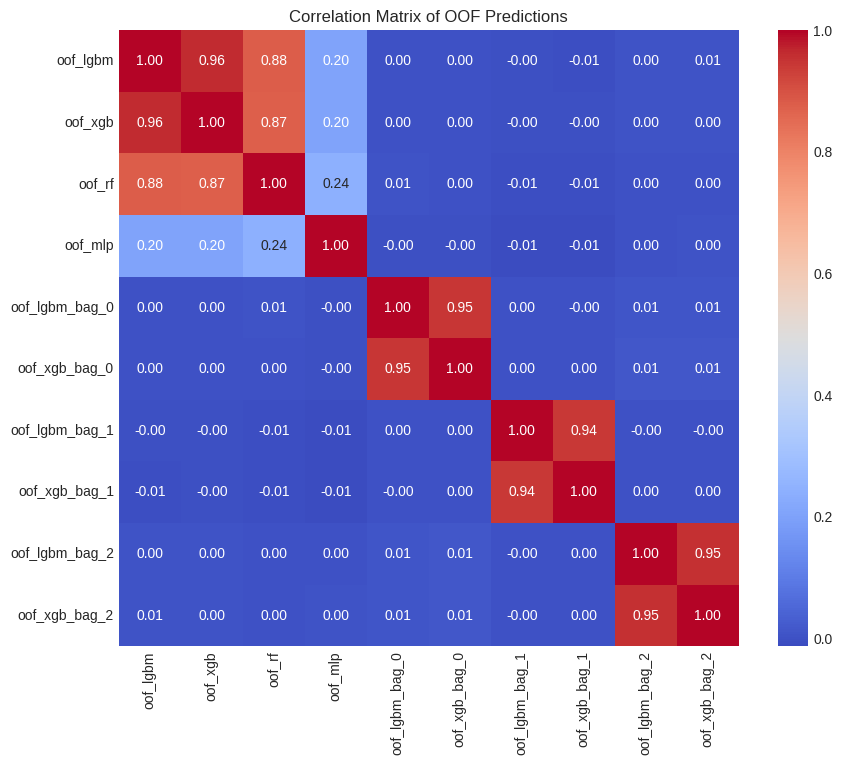


Analysis Complete. Use the leaderboard and heatmap to select final models for ensembling.


In [40]:
# ## 6. Analysis: Performance and Diversity of Ensemble Candidates

print("\n--- Analyzing Ensemble Candidates ---")

# --- Step 6.1: Individual Performance Check ---
oof_scores = []
for col in oof_df.columns:
    score = roc_auc_score(y, oof_df[col])
    oof_scores.append({'Model': col, 'ROC AUC': score})

oof_leaderboard = pd.DataFrame(oof_scores).sort_values(by='ROC AUC', ascending=False)
print("\n--- OOF Performance Leaderboard ---")
print(oof_leaderboard.round(4))

# --- Step 6.2: Diversity Check (Prediction Correlation) ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    oof_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Matrix of OOF Predictions')
plt.show()

print("\nAnalysis Complete. Use the leaderboard and heatmap to select final models for ensembling.")

In [41]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

Libraries imported successfully.


In [42]:
# --- Define final feature set and target ---
features_to_use = [col for col in train_df_cleaned.columns if col not in ['id', 'song_popularity']]
X = train_df_cleaned[features_to_use]
y = train_df_cleaned['song_popularity']

# --- Define Seeds for Ensemble Diversity ---
SEEDS = [42, 101, 2024, 888, 1337]

print(f"\nSetup complete. Ready to build a {3 * len(SEEDS)}-model ensemble.")


Setup complete. Ready to build a 15-model ensemble.


In [43]:
oof_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_df = pd.DataFrame(index=X.index)


print("OOF prediction function is ready.")

OOF prediction function is ready.


In [44]:
# ## 3. Main Ensemble Generation Loop
# This loop will train all 15 models and store their OOF predictions.

print("--- Starting 15-model OOF generation ---")

# Define the models and their best parameters
models_to_run = {
    "lgbm": (lgb.LGBMClassifier, best_lgbm_params),
    "xgb": (xgb.XGBClassifier, best_xgb_params),
    "rf": (RandomForestClassifier, best_rf_params)
}

# Loop through each model type
for model_name, (model_class, params) in models_to_run.items():
    # Loop through each seed
    for seed in SEEDS:
        print(f"Running {model_name} with seed {seed}...")
        
        # Add the seed to the model parameters
        current_params = params.copy()
        current_params['random_state'] = seed
        
        # Handle specific parameter names
        if model_name == 'rf':
            current_params['class_weight'] = 'balanced'

        # Instantiate the model
        model = model_class(**current_params)
        
        # Generate and store OOF predictions
        oof_col_name = f'oof_{model_name}_seed_{seed}'
        oof_df[oof_col_name] = generate_oof_predictions(model, X, y, oof_cv)

print("\n--- OOF prediction generation complete for all 15 models ---")
print("Final OOF DataFrame shape:", oof_df.shape)
print(oof_df.head())

--- Starting 15-model OOF generation ---
Running lgbm with seed 42...
Running lgbm with seed 101...
Running lgbm with seed 2024...
Running lgbm with seed 888...
Running lgbm with seed 1337...
Running xgb with seed 42...
Running xgb with seed 101...
Running xgb with seed 2024...
Running xgb with seed 888...
Running xgb with seed 1337...
Running rf with seed 42...
Running rf with seed 101...
Running rf with seed 2024...
Running rf with seed 888...
Running rf with seed 1337...

--- OOF prediction generation complete for all 15 models ---
Final OOF DataFrame shape: (30000, 15)
   oof_lgbm_seed_42  oof_lgbm_seed_101  oof_lgbm_seed_2024  oof_lgbm_seed_888  \
0          0.433751           0.433751            0.433751           0.433751   
1          0.508836           0.508836            0.508836           0.508836   
2          0.405057           0.405057            0.405057           0.405057   
3          0.363538           0.363538            0.363538           0.363538   
4          0.29


--- Creating and Evaluating the Final Ensemble ---

Best Single Model (lgbm_seed_42) OOF AUC: 0.5835
Final 15-Model Ensemble OOF AUC: 0.5839
Relative Improvement over Best Single Model: 0.06%


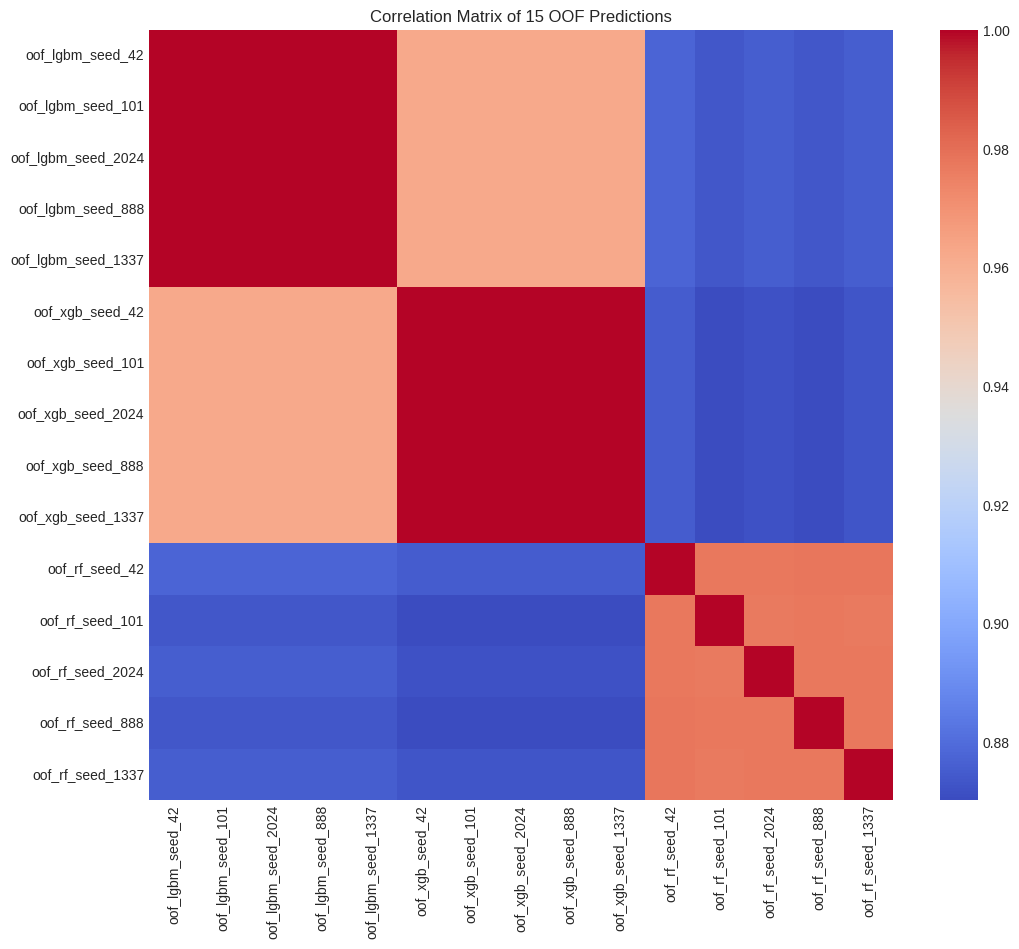

In [45]:
# ## 4. Final Ensemble Creation and Evaluation

print("\n--- Creating and Evaluating the Final Ensemble ---")

# --- Step 4.1: Create the Simple Averaging Ensemble ---
# This is the most robust method for combining strong, similar models.
oof_df['ensemble_prediction'] = oof_df.mean(axis=1)

# --- Step 4.2: Evaluate the Final Ensemble ---
final_auc = roc_auc_score(y, oof_df['ensemble_prediction'])
best_single_model_auc = roc_auc_score(y, oof_df.iloc[:,0]) 

print(f"\nBest Single Model (lgbm_seed_42) OOF AUC: {best_single_model_auc:.4f}")
print(f"Final 15-Model Ensemble OOF AUC: {final_auc:.4f}")

improvement = (final_auc - best_single_model_auc) / best_single_model_auc
print(f"Relative Improvement over Best Single Model: {improvement:.2%}")


# --- Step 4.3: Visualize Prediction Diversity ---
plt.figure(figsize=(12, 10))
sns.heatmap(
    oof_df.drop('ensemble_prediction', axis=1).corr(),
    annot=False, # Annotations would make it unreadable
    cmap='coolwarm'
)
plt.title('Correlation Matrix of 15 OOF Predictions')
plt.show()

In [46]:

import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from feature_engine.outliers import Winsorizer

print("Libraries imported successfully.")

Libraries imported successfully.


In [47]:
test_df = pd.read_csv("test.csv")
test_ids = test_df['id']


In [53]:
# ## 2. Fit Preprocessors on the FULL Training Data
# This function encapsulates the entire cleaning pipeline. We will fit it on the
# training data to learn the parameters for clipping, imputation, and winsorization.

def fit_preprocessors(df):
    """Fits all preprocessors on the training data in the correct order."""
    print("--- Fitting preprocessors on training data ---")
    
    # --- Create a cleaned version of the training data first ---
    df_fit = df.copy()

    # 1. Convert duration
    if 'song_duration_ms' in df_fit.columns:
        df_fit['song_duration_s'] = df_fit['song_duration_ms'] / 1000
        df_fit = df_fit.drop('song_duration_ms', axis=1)

    # 2. Semantic Clipping
    semantic_clip_cols = [
        'acousticness', 'danceability', 'energy', 'instrumentalness', 
        'liveness', 'speechiness', 'audio_valence'
    ]
    for col in semantic_clip_cols:
        if col in df_fit.columns:
            df_fit[col] = df_fit[col].clip(0, 1)

    # 3. Fit Imputation tools
    categorical_cols = ['key']
    encoder = OrdinalEncoder()
    encoder.fit(df_fit[categorical_cols])
    
    impute_df_fit = df_fit.copy()
    impute_df_fit[categorical_cols] = encoder.transform(impute_df_fit[categorical_cols])
    
    feature_cols_for_imputer = [col for col in impute_df_fit.columns if col not in ['id', 'song_popularity']]
    
    missforest_imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=10, random_state=42),
        max_iter=5, random_state=42, initial_strategy='median'
    )
    missforest_imputer.fit(impute_df_fit[feature_cols_for_imputer])

    # 4. Fit Winsorizer
    # The winsorizer needs complete data to fit, so we do a temporary transform
    temp_imputed_data = missforest_imputer.transform(impute_df_fit[feature_cols_for_imputer])
    temp_imputed_df = pd.DataFrame(temp_imputed_data, columns=feature_cols_for_imputer)
    
    winsorize_cols = ['loudness', 'tempo', 'song_duration_s']
    mad_winsorizer = Winsorizer(capping_method='mad', tail='both', fold=3, variables=winsorize_cols)
    mad_winsorizer.fit(temp_imputed_df)
    
    print("All preprocessors have been fitted.")
    return semantic_clip_cols, encoder, missforest_imputer, mad_winsorizer

# Fit all our preprocessing tools
train_df_new = pd.read_csv('train.csv')
semantic_clip_cols, encoder, missforest_imputer, mad_winsorizer = fit_preprocessors(train_df_new)

--- Fitting preprocessors on training data ---
All preprocessors have been fitted.


In [54]:
def clean_data(df, clip_cols, enc, imputer, winsorizer):
    """Applies the fitted preprocessing steps to new data in the correct order."""
    print(f"--- Cleaning {len(df)} rows of data ---")
    df_clean = df.copy()

    # 1. Convert duration FIRST
    if 'song_duration_ms' in df_clean.columns:
        df_clean['song_duration_s'] = df_clean['song_duration_ms'] / 1000
        df_clean = df_clean.drop('song_duration_ms', axis=1)

    # 2. Semantic Clipping
    for col in clip_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].clip(0, 1)
            
    # 3. Imputation
    feature_cols_for_imputer = [col for col in df_clean.columns if col not in ['id', 'song_popularity']]
    categorical_cols = ['key']
    
    impute_df_transform = df_clean.copy()
    impute_df_transform[categorical_cols] = enc.transform(impute_df_transform[categorical_cols])
    
    imputed_data = imputer.transform(impute_df_transform[feature_cols_for_imputer])
    df_imputed = pd.DataFrame(imputed_data, columns=feature_cols_for_imputer, index=df.index)
    
    df_imputed[categorical_cols] = enc.inverse_transform(df_imputed[categorical_cols])
    df_imputed[categorical_cols] = df_imputed[categorical_cols].round().astype(int)

    # 4. Winsorization
    df_winsorized = winsorizer.transform(df_imputed)
    
    # Re-add the ID column if it exists in the original df
    if 'id' in df.columns:
        df_winsorized['id'] = df['id']

    print("Cleaning complete.")
    return df_winsorized

test_df_cleaned = clean_data(test_df, semantic_clip_cols, encoder, missforest_imputer, mad_winsorizer)

--- Cleaning 10000 rows of data ---
Cleaning complete.


In [55]:
# ## 4. Train Final Ensemble and Predict on Test Set

print("--- Training final 15-model ensemble on full training data ---")

# Use the best hyperparameters we found
best_lgbm_params = {'n_estimators': 202, 'learning_rate': 0.0409, 'num_leaves': 40, 'max_depth': 3, 'lambda_l1': 0.73, 'lambda_l2': 0.00028}
best_xgb_params = {'n_estimators': 251, 'learning_rate': 0.0340, 'max_depth': 3, 'lambda': 5.19e-08, 'alpha': 8.08}
best_rf_params = {'n_estimators': 237, 'max_depth': 9, 'min_samples_leaf': 31, 'max_features': 0.214}
SEEDS = [42, 101, 2024, 888, 1337]

models_to_run = {
    "lgbm": (lgb.LGBMClassifier, best_lgbm_params),
    "xgb": (xgb.XGBClassifier, best_xgb_params),
    "rf": (RandomForestClassifier, best_rf_params)
}

test_predictions = pd.DataFrame(index=test_df.index)
features_to_use = [col for col in train_df_cleaned.columns if col not in ['id', 'song_popularity']]
X_train = train_df_cleaned[features_to_use]
y_train = train_df_cleaned['song_popularity']
X_test = test_df_cleaned[features_to_use]


for model_name, (model_class, params) in models_to_run.items():
    for seed in SEEDS:
        print(f"Training and predicting with {model_name} seed {seed}...")
        current_params = params.copy()
        current_params['random_state'] = seed
        if model_name == 'rf': current_params['class_weight'] = 'balanced'
        
        model = model_class(**current_params)
        model.fit(X_train, y_train)
        
        test_predictions[f'pred_{model_name}_{seed}'] = model.predict_proba(X_test)[:, 1]

print("\n--- Prediction generation complete ---")

--- Training final 15-model ensemble on full training data ---
Training and predicting with lgbm seed 42...
Training and predicting with lgbm seed 101...
Training and predicting with lgbm seed 2024...
Training and predicting with lgbm seed 888...
Training and predicting with lgbm seed 1337...
Training and predicting with xgb seed 42...
Training and predicting with xgb seed 101...
Training and predicting with xgb seed 2024...
Training and predicting with xgb seed 888...
Training and predicting with xgb seed 1337...
Training and predicting with rf seed 42...
Training and predicting with rf seed 101...
Training and predicting with rf seed 2024...
Training and predicting with rf seed 888...
Training and predicting with rf seed 1337...

--- Prediction generation complete ---


In [56]:
# ## 5. Create and Save the Submission File

print("--- Creating final submission file ---")

# Create the final ensemble prediction by averaging all 15 models
final_prediction = test_predictions.mean(axis=1)

# Create the submission DataFrame in the required format
submission_df = pd.DataFrame({
    'id': test_ids,
    'song_popularity': final_prediction
})

# Save to CSV
submission_df.to_csv('submissions.csv', index=False)

print("\n✅ submissions.csv has been created successfully!")
print(submission_df.head())

--- Creating final submission file ---

✅ submissions.csv has been created successfully!
   id  song_popularity
0   0         0.403686
1   1         0.344304
2   2         0.346892
3   3         0.452500
4   4         0.438061


In [57]:
from sklearn.metrics import f1_score

oof_ensemble_prediction = oof_df.mean(axis=1)

# --- Step 2: Find the Optimal Threshold ---
print("--- Finding optimal threshold on OOF predictions ---")
thresholds = np.linspace(0, 1, 100) # Test 100 different thresholds
f1_scores = []

for thresh in thresholds:
    # Apply threshold to get binary predictions
    oof_preds_binary = (oof_ensemble_prediction >= thresh).astype(int)
    # Calculate F1 score
    score = f1_score(y, oof_preds_binary)
    f1_scores.append(score)

best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal Threshold found: {best_threshold:.4f}")
print(f"Best F1-score on OOF data: {np.max(f1_scores):.4f}")

--- Finding optimal threshold on OOF predictions ---
Optimal Threshold found: 0.3131
Best F1-score on OOF data: 0.5373


In [59]:
# --- Step 3: Create the Final Submission File ---
print("\n--- Creating final submission file with the optimal threshold ---")

# Create the final ensemble prediction for the TEST set
final_test_prediction_proba = test_predictions.mean(axis=1)

# Apply the optimal threshold to the TEST set probabilities
final_test_prediction_binary = (final_test_prediction_proba >= 0.5).astype(int)

# Create the submission DataFrame in the required format
submission_df = pd.DataFrame({
    'id': test_ids,
    'song_popularity': final_test_prediction_binary
})

# Save to CSV
submission_df.to_csv('submissions.csv', index=False)

print("\n✅ submissions.csv has been created successfully with 0/1 predictions!")
print("Sample of the final submission file:")
print(submission_df.head())
print("\nClass distribution in submission file:")
print(submission_df['song_popularity'].value_counts(normalize=True))


--- Creating final submission file with the optimal threshold ---

✅ submissions.csv has been created successfully with 0/1 predictions!
Sample of the final submission file:
   id  song_popularity
0   0                0
1   1                0
2   2                0
3   3                0
4   4                0

Class distribution in submission file:
song_popularity
0    0.9591
1    0.0409
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import optuna

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

optuna.logging.set_verbosity(optuna.logging.WARNING)

# =====================
# 1. Load Data
# =====================
train = pd.read_csv("/kaggle/input/iisc-umc-301-kaggle-competition-1/train.csv")
test = pd.read_csv("/kaggle/input/iisc-umc-301-kaggle-competition-1/test.csv")
target = "song_popularity"
id_col = "id"

# Separate target and features
X = train.drop([target, id_col], axis=1)
y = train[target]
X_test = test.drop([id_col], axis=1)

# Label encode categorical features FIRST
cat_features = X.select_dtypes(include=["object"]).columns.tolist()
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# =====================
# 2. Leak-Free Feature Engineering Function
# =====================
# This function now takes a training dataframe to learn scaling parameters from
def feature_engineering(df, train_df=None):
    df = df.copy()
    
    # Use the training data's parameters if provided (for val and test sets)
    if train_df is not None:
        loudness_mean = train_df["loudness"].mean()
        loudness_std = train_df["loudness"].std()
    # Otherwise, calculate from the df itself (for the training set)
    else:
        loudness_mean = df["loudness"].mean()
        loudness_std = df["loudness"].std()
        
    if "song_duration_ms" in df.columns:
        df["log_duration"] = np.log1p(df["song_duration_ms"])
    if "loudness" in df.columns:
        df["loudness_scaled"] = (df["loudness"] - loudness_mean) / (loudness_std + 1e-6)
    if "tempo" in df.columns:
        # Qcut can be leaky too, but it's less severe. We'll keep it simple for now.
        df["tempo_bin"] = pd.qcut(df["tempo"], q=5, labels=False, duplicates="drop")
    if "danceability" in df.columns and "energy" in df.columns:
        df["dance_energy"] = df["danceability"] * df["energy"]
        
    return df

# =====================
# 3. OOF Training with In-Loop Feature Engineering
# =====================
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_preds_xgb = np.zeros(len(X))
oof_preds_lgb = np.zeros(len(X))
oof_preds_cat = np.zeros(len(X))

test_preds_xgb = np.zeros(len(X_test))
test_preds_lgb = np.zeros(len(X_test))
test_preds_cat = np.zeros(len(X_test))

# We need the original, unprocessed test data for each fold's transformation
X_test_original = X_test.copy()

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    print(f"===== Fold {fold} =====")
    X_tr_orig, X_val_orig = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # --- Apply feature engineering INSIDE the loop ---
    # 1. Fit and transform on training data
    X_tr = feature_engineering(X_tr_orig, train_df=None)
    # 2. Transform validation data using training data parameters
    X_val = feature_engineering(X_val_orig, train_df=X_tr_orig)
    # 3. Transform test data using training data parameters
    X_test = feature_engineering(X_test_original, train_df=X_tr_orig)

    # --- XGBoost ---
    model_xgb = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.02, max_depth=7, subsample=0.8, colsample_bytree=0.8, eval_metric="auc", random_state=42, use_label_encoder=False)
    model_xgb.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False, early_stopping_rounds=50)
    oof_preds_xgb[val_idx] = model_xgb.predict_proba(X_val)[:, 1]
    test_preds_xgb += model_xgb.predict_proba(X_test)[:, 1] / kf.n_splits

    # --- LightGBM ---
    model_lgb = lgb.LGBMClassifier(n_estimators=2000, learning_rate=0.01, num_leaves=64, max_depth=-1, subsample=0.8, colsample_bytree=0.8, random_state=42, verbosity=-1)
    model_lgb.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], eval_metric="auc", callbacks=[lgb.early_stopping(50, verbose=False)])
    oof_preds_lgb[val_idx] = model_lgb.predict_proba(X_val)[:, 1]
    test_preds_lgb += model_lgb.predict_proba(X_test)[:, 1] / kf.n_splits

    # --- CatBoost ---
    model_cat = CatBoostClassifier(iterations=1000, learning_rate=0.03, depth=8, eval_metric="AUC", random_seed=42, verbose=0)
    model_cat.fit(X_tr, y_tr, eval_set=(X_val, y_val), cat_features=cat_features, use_best_model=True)
    oof_preds_cat[val_idx] = model_cat.predict_proba(X_val)[:, 1]
    test_preds_cat += model_cat.predict_proba(X_test)[:, 1] / kf.n_splits

# =====================
# 4. Simple Weighted Ensemble with Optuna
# =====================
def objective(trial):
    w_xgb = trial.suggest_float('w_xgb', 0, 1)
    w_lgb = trial.suggest_float('w_lgb', 0, 1)
    w_cat = trial.suggest_float('w_cat', 0, 1)
    
    # Normalize weights to ensure they sum to 1
    total_weight = w_xgb + w_lgb + w_cat
    if total_weight == 0: return 0.0 # Avoid division by zero
    
    oof_preds = (
        (w_xgb * oof_preds_xgb) +
        (w_lgb * oof_preds_lgb) +
        (w_cat * oof_preds_cat)
    ) / total_weight
    
    return roc_auc_score(y, oof_preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
best_weights = study.best_params
total_weight = sum(best_weights.values())

print(f"\nClean OOF AUC for XGB: {roc_auc_score(y, oof_preds_xgb):.5f}")
print(f"Clean OOF AUC for LGB: {roc_auc_score(y, oof_preds_lgb):.5f}")
print(f"Clean OOF AUC for CAT: {roc_auc_score(y, oof_preds_cat):.5f}")
print(f"\nBest OOF AUC from Optuna Ensemble: {study.best_value:.5f}")
print("Best weights:", best_weights)

# Apply the normalized weights to the test predictions
final_preds = (
    (best_weights['w_xgb'] * test_preds_xgb) +
    (best_weights['w_lgb'] * test_preds_lgb) +
    (best_weights['w_cat'] * test_preds_cat)
) / total_weight

# =====================
# 5. Submission
# =====================
submission = pd.DataFrame({
    id_col: test[id_col],
    target: (final_preds * 9999).astype(int)
})
submission.to_csv("/kaggle/working/submission.csv", index=False)
print("good to go")